In [1]:
# импорт необходимых для работы библиотек
import numpy as np
import pandas as pd

In [2]:
# считывание информации с таблицы titanic
data = pd.read_csv('titanic.csv')

In [3]:
# вывод таблицы
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# проверка, в каких столбцах имеются пустые значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# более удобная версия
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# заполнение пустых значений модой(самым распространённым значением столбца)
data.age.fillna(data.age.mode()[0], inplace = True)
data.deck.fillna(data.deck.mode()[0], inplace = True)
data.embark_town.fillna(data.embark_town.mode()[0], inplace = True)

<AxesSubplot:>

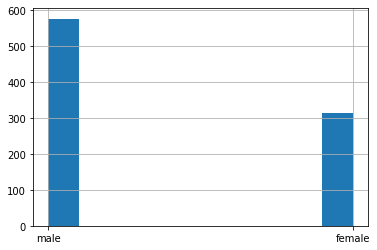

In [7]:
# вывод гистограммы для сравнения, кого среди пассажиров больше, мужчин или женщин
data.sex.hist()

In [8]:
# подтверждение кодом
print('больше:', data.sex.mode()[0])

больше: male


In [9]:
# процент взрослых мужчин от всех пассажиров
str(int(data.who.value_counts('man')[0] * 100)) + '%'

'60%'

In [10]:
# количество людей в каждом классе
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
data.describe()
# по выведенной таблице видно, что на Титанике был 891 человек, при этом выжило чуть меньше половины; в среднем им было 29 лет;
# у большей части на пароходе были родственники; среднее значение цены за билет: 32;
# самому старому пассажиру было 80 лет; самый большое значение цены за билет: 512.3292.

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# создание новой таблицы, в которой только выжившие пассажиры
survived_data = data.copy(deep=True)
survived_data = survived_data.loc[survived_data['survived'] != 0]

In [13]:
# проверка, сработало ли
survived_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,C,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,C,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [14]:
# процент взрослых мужчин от всех пассажиров
str(int(survived_data.who.value_counts('man')[0] * 100)) + '%'
# как видно, процент взрослых мужчин снизился

'59%'

In [15]:
print(str(int(survived_data.alone.value_counts(True)[0] * 100)) + '%')
print(str(int(data.alone.value_counts(True)[0] * 100)) + '%')
# процент одиноких людей возрос :(

52%
39%
